#FastQuant Backtesting Suite - Python

##Installation

In [2]:
!pip install fastquant

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 48.7 MB/s eta 0:00:00


In [12]:
# download stock data
from fastquant import get_stock_data
df = get_stock_data("AMZN", "2018-01-01", "2019-01-01")
df

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,volume
dt,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,85590000
...,...,...,...,...,...
2018-12-24,67.300003,69.801498,65.349998,67.197998,144400000
2018-12-26,68.444504,73.657997,68.150497,73.544998,208236000
2018-12-27,72.709999,73.449997,69.515503,73.082001,194440000


##Single Strategy Backtest

Single Strategy Backtest: The library provides many strategies to choose from and the backtest() function can be called by passing in the name of the strategy as the first parameter, followed by the dataframe with price data, along with other parameters for the strategy. The return_history parameter returns a dictionary to view the specific buy and sell orders that result from implementing the strategey.

Starting Portfolio Value: 100000.00
2018-12-31T00:00:00, ===Global level arguments===
2018-12-31T00:00:00, init_cash : 100000
2018-12-31T00:00:00, buy_prop : 1
2018-12-31T00:00:00, sell_prop : 1
2018-12-31T00:00:00, commission : 0
2018-12-31T00:00:00, stop_loss : 0
2018-12-31T00:00:00, stop_trail : 0
2018-12-31T00:00:00, take_profit : 0
2018-12-31T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 15
slow_period : 40
2018-12-31T00:00:00, Final Portfolio Value: 107902.12255859375
2018-12-31T00:00:00, Final PnL: 7902.12
Time used (seconds): 0.1414957046508789
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	a

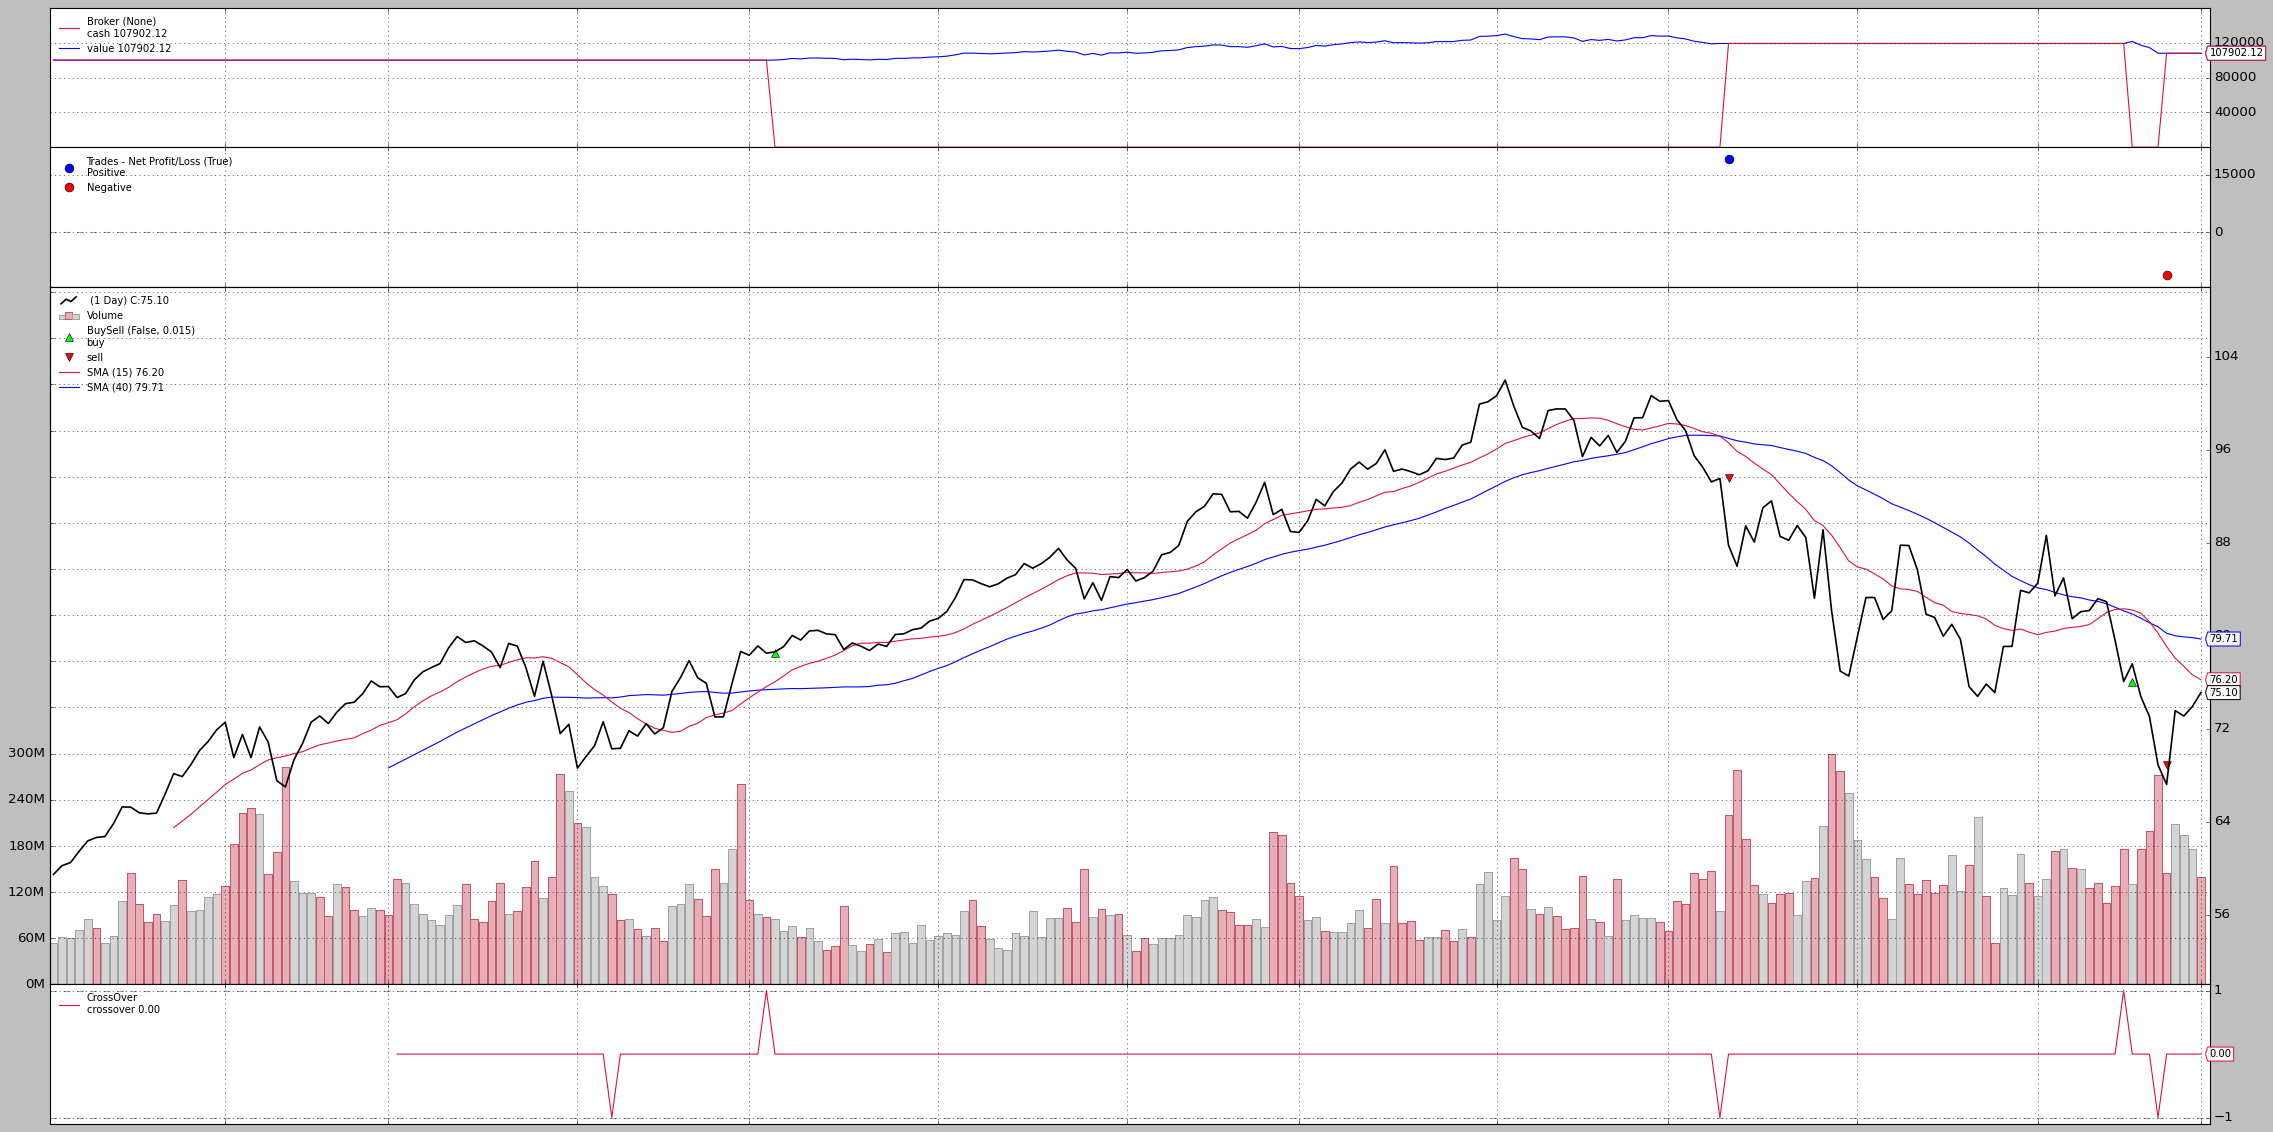

In [4]:
from fastquant import backtest
res, hist = backtest('smac', df, fast_period=15, slow_period=40, return_history=True)

# Starting Portfolio Value: 100000.00
# Final Portfolio Value: 102272.90

In [5]:
# can view history of orders in the strategy
hist['orders']

,strat_id,strat_name,dt,type,price,size,order_value,portfolio_value,commission,pnl
0,0,fast_period15_slow_period40,2018-05-03,buy,78.484001,1272,99831.649475,100152.633789,0.0,0.000000
1,0,fast_period15_slow_period40,2018-10-10,sell,93.515999,-1272,99831.649475,119120.701050,0.0,19120.701050
2,0,fast_period15_slow_period40,2018-12-18,buy,76.045502,1564,118935.164673,121511.268463,0.0,0.000000
3,0,fast_period15_slow_period40,2018-12-24,sell,68.872498,-1564,118935.164673,107902.122559,0.0,-11218.578491


##Multiple Strategy Backtest

Multiple Strategy Backtest: The library has a functionality to test multiple different strategies together so a buy indicator from either strategy results in buying the stock and similarly for a sell indicator by either strategy. We can also pass in lists for each of the parameters to complete an automated grid search over the parameters, the grid search functionality is defined in more detail below. In this example, the final PnL is seen in the output to be $19940.78.

In [6]:
# strats_opt = {
#     "smac": {"fast_period": [10,15], "slow_period": [40, 60]},
#     "rsi": {"rsi_lower": [20, 30], "rsi_upper": [70, 80]}
# }
# res_opt = backtest("multi", df, strats=strats_opt)
# res_opt.shape

strats = {
    "smac": {"fast_period": 35, "slow_period": 50},
    "rsi": {"rsi_lower": 30, "rsi_upper": 70}
}
res = backtest("multi", df, strats=strats)

Starting Portfolio Value: 100000.00
2018-12-31T00:00:00, ===Global level arguments===
2018-12-31T00:00:00, init_cash : 100000
2018-12-31T00:00:00, buy_prop : 1
2018-12-31T00:00:00, sell_prop : 1
2018-12-31T00:00:00, commission : 0
2018-12-31T00:00:00, stop_loss : 0
2018-12-31T00:00:00, stop_trail : 0
2018-12-31T00:00:00, take_profit : 0
2018-12-31T00:00:00, allow_short : False
===Strategy level arguments===
fast_period : 35
slow_period : 50
2018-12-31T00:00:00, ===Global level arguments===
2018-12-31T00:00:00, init_cash : 100000
2018-12-31T00:00:00, buy_prop : 1
2018-12-31T00:00:00, sell_prop : 1
2018-12-31T00:00:00, commission : 0
2018-12-31T00:00:00, stop_loss : 0
2018-12-31T00:00:00, stop_trail : 0
2018-12-31T00:00:00, take_profit : 0
2018-12-31T00:00:00, allow_short : False
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2018-05-22T00:00:00, BUY CREATE, 79.07
2018-05-22T00:00:00, Cash: 100000.0
2018-05-22T00:00:00, Price: 79.06999969482422
2018-05-22T00

##Grid Search

Grid Search: The library provides built-in grid search if strategy parameters are lists when calling the backtest() function. We can also create a scatter plot that visualizes both parameters along with the net profit for each pair, so in this case the scatter plot shows the net profit for each pair of slow_period and fast_period parameter selection. We can then find the max profit that results from the best parameter selection. The built-in grid search in the backtest() function is optimized and has been proven to be slightly faster than the basic manual loop-based grid search. In this example, the optimal parameters were a slow period of 30 days and a fast period of 19 days which resulted in a profit of $29439.

In [7]:
# grid search over parameters in trading strategy
import numpy as np

fast_periods = np.arange(1,20,1, dtype=int)
slow_periods = np.arange(20,241,5, dtype=int)

from time import time
start_time = time()
results = backtest("smac",
                   df,
                   fast_period=fast_periods,
                   slow_period=slow_periods,
                   verbose=False,
                   plot=False
                  )
end_time = time()
time_optimized = end_time-start_time

In [8]:
import numpy as np
init_cash=100000
period_grid = np.zeros(shape=(len(fast_periods),len(slow_periods)))

start_time = time()
for i,fast_period in enumerate(fast_periods):
    for j,slow_period in enumerate(slow_periods):
        results = backtest('smac',
                           df,
                           fast_period=fast_period,
                           slow_period=slow_period,
                           init_cash=100000,
                           verbose=False,
                           plot=False
                          )
        net_profit = results.final_value.values[0]-init_cash
        period_grid[i,j] = net_profit
end_time = time()

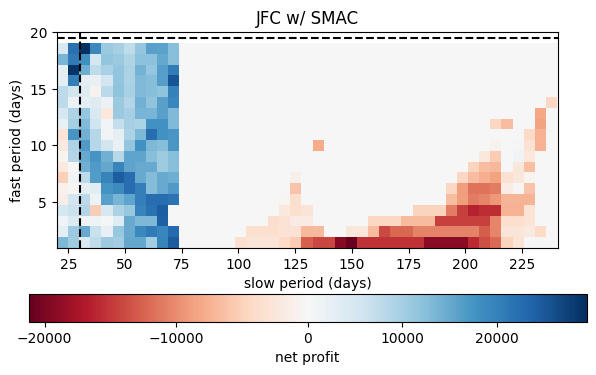

In [13]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as pl
pl.style.use("default")

fig, ax = pl.subplots(1,1, figsize=(8,4))
xmin, xmax = slow_periods[0],slow_periods[-1]
ymin, ymax = fast_periods[0],fast_periods[-1]

#make a diverging color map such that profit<0 is red and blue otherwise
cmap = pl.get_cmap('RdBu')
norm = mcolors.TwoSlopeNorm(vmin=period_grid.min(),
                             vmax = period_grid.max(),
                             vcenter=0
                            )
#plot matrix
cbar = ax.imshow(period_grid,
                 origin='lower',
                 interpolation='none',
                 extent=[xmin, xmax, ymin, ymax],
                 cmap=cmap,
                 norm=norm
                )
pl.colorbar(cbar, ax=ax, shrink=0.9,
            label='net profit', orientation="horizontal")

# search position with highest net profit
y, x = np.unravel_index(np.argmax(period_grid), period_grid.shape)
best_slow_period = slow_periods[x]
best_fast_period = fast_periods[y]
# mark position
# ax.annotate(f"max profit={period_grid[y, x]:.0f}@({best_slow_period}, {best_fast_period}) days",
#             (best_slow_period+5,best_fast_period+1)
#            )
ax.axvline(best_slow_period, 0, 1, c='k', ls='--')
ax.axhline(best_fast_period+0.5, 0, 1, c='k', ls='--')

# add labels
ax.set_aspect(5)
pl.setp(ax,
        xlim=(xmin,xmax+1),
        ylim=(ymin,ymax+1),
        xlabel='slow period (days)',
        ylabel='fast period (days)',
        title='JFC w/ SMAC',
       );

In [12]:
print(f"max profit={period_grid[y, x]:.0f} @ ({best_slow_period},{best_fast_period}) days")

max profit=29439 @ (30,19) days


##Optimal Portfolio Weighting

Optimal Portfolio Weighting: If we want to invest in multiple companies within our portfolio and want to find the optimal weighting of each stock in the portfolio, FastQuant provides an built-in implementation of the Modern Portfolio Theory developed by Harry Markovitz. We can pass in the list of stock tickers to include in the portfolio along with a timeframe. The function will output the optimal weighting for each stock along with the expected return, volatility, and Sharpe ratio of the portfolio over that time. We can also get the plot expected return, volatility, and Sharpe ratio for each possible weighting.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Optimal weights: [0.8   0.    0.162 0.038]
Expected return, volatility and Sharpe ratio: [0.28102414558781047, 0.2270447829135622, 1.2377476459998584]


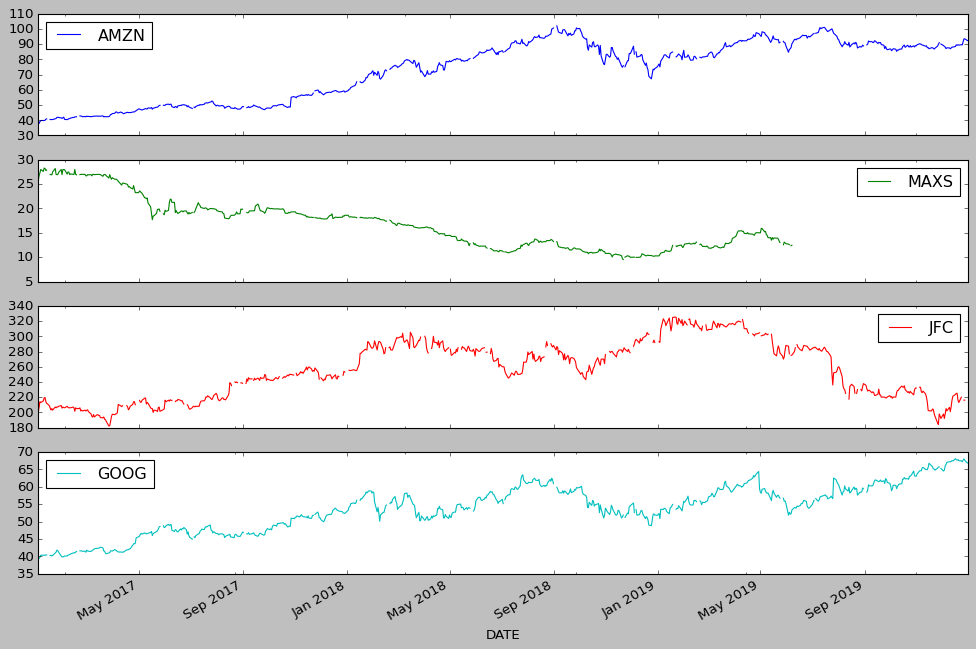

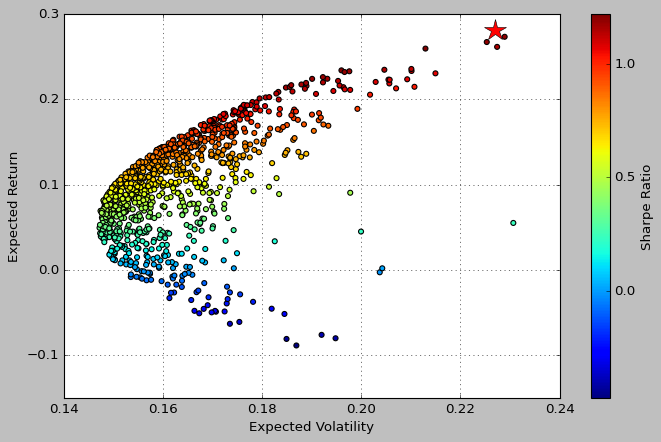

In [26]:
from fastquant import Portfolio
stock_list = ['AMZN', 'MAXS', 'JFC', 'GOOG']
p = Portfolio(stock_list,"2017-01-01", "2020-01-01")

axs = p.data.plot(subplots=True, figsize=(15,10))
fig = p.plot_portfolio(N=1000)

## News Sentiment Strategy

New Sentiment Strategy: Currently, this functionality is not working becasue of a bug in the library but it should be working otherwise. One unique function to this library that is not present in most other libraries is the ability to parse news articles about a certain keyword, which would usually be the company name. The library then scrapes the Business Times website for the most recent news articles that match the keyword given. After scraping for articles, the library also calculates a sentiment score that is either positive or negative based on the contents of the news article. After this, we can then call the backtest() function and pass in "sentiment" as the strategy name, pass in the scraped sentiments, along with a threshold that triggers a buy if the sentiment score is above/below a certain value.

In [ ]:
from fastquant import get_bt_news_sentiment

#scrape the first 3 pages of https://www.businesstimes.com.sg/search/meta?page=1&filter=headline_en
sentiments = get_bt_news_sentiment(keyword="amazon", page_nums=3)
sentiments

In [ ]:
from fastquant import backtest
from fastquant import get_yahoo_data

#initiate buy/sell if senti>0.2/senti<-0.2
data = get_yahoo_data("AMZN", "2024-01-01", "2024-03-24")
backtest("sentiment", data, sentiments=sentiments, senti=0.2)

## User-Defined Strategy

New Sentiment Strategy: Another useful function in the library is being able define your own custom strategy and implementing specific buy and sell signals for that strategy. Instead of having to use one of the pre-defined strategies, users can implement their own strategy and test with the backtesting suite. They just have extend the BaseStrategy class when creating the class in Python and also override the buy_signal() and sell_signal() functions. In this example, we use a simple MACD crossover as the custom strategy to outline how to create a custom strategy and the total PnL is $10229.17.

In [22]:
from fastquant import CustomStrategy, BaseStrategy
from fastquant.indicators import MACD, CrossOver
from fastquant.indicators.custom import CustomIndicator


# Create a subclass of the BaseStrategy, We call this MAMAStrategy (MACD + ALMA)
class MAMAStrategy(BaseStrategy):

    params = (
        ("macd_fast_period", 12),  # period for the MACD
        ("macd_slow_period", 16),
        ("macd_signal_period",9)
    )

    def __init__(self):
        # Initialize global variables
        super().__init__()

        # Setup MACD indicator parameters
        self.macd_fast_period = self.params.macd_fast_period
        self.macd_slow_period = self.params.macd_slow_period
        self.macd_signal_period = self.params.macd_signal_period


        # Setup MACD indicator, macd line and macd signal line, and macd signal line crossover
        self.macd_ind = MACD(
            period_me1=self.macd_fast_period,
            period_me2=self.macd_slow_period,
            period_signal=self.macd_signal_period
        )
        self.macd = self.macd_ind.macd
        self.macd_signal = self.macd_ind.signal

        # Add signal line cross over
        self.macd_signal_crossover = CrossOver(
            self.macd_ind, self.macd_signal
        )

        print("===Strategy level arguments===")
        print("PARAMS: ", self.params)


    # Buy when the custom indicator is below the lower limit, and sell when it's above the upper limit
    def buy_signal(self):
        return self.macd_signal_crossover > 0       # MACD crosses signal line upward

    def sell_signal(self):
        return self.macd_signal_crossover < 0

Starting Portfolio Value: 100000.00
2018-12-31T00:00:00, ===Global level arguments===
2018-12-31T00:00:00, init_cash : 100000
2018-12-31T00:00:00, buy_prop : 1
2018-12-31T00:00:00, sell_prop : 1
2018-12-31T00:00:00, commission : 0
2018-12-31T00:00:00, stop_loss : 0
2018-12-31T00:00:00, stop_trail : 0
2018-12-31T00:00:00, take_profit : 0
2018-12-31T00:00:00, allow_short : False
===Strategy level arguments===
PARAMS:  <backtrader.metabase.AutoInfoClass_LineRoot_LineMultiple_LineSeries_LineIterator_DataAccessor_StrategyBase_Strategy_BaseStrategy_MAMAStrategy object at 0x7c9556ed9c90>
2018-12-31T00:00:00, Final Portfolio Value: 110229.16951751709
2018-12-31T00:00:00, Final PnL: 10229.17
Time used (seconds): 0.288593053817749
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['MAMAStrategy']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage

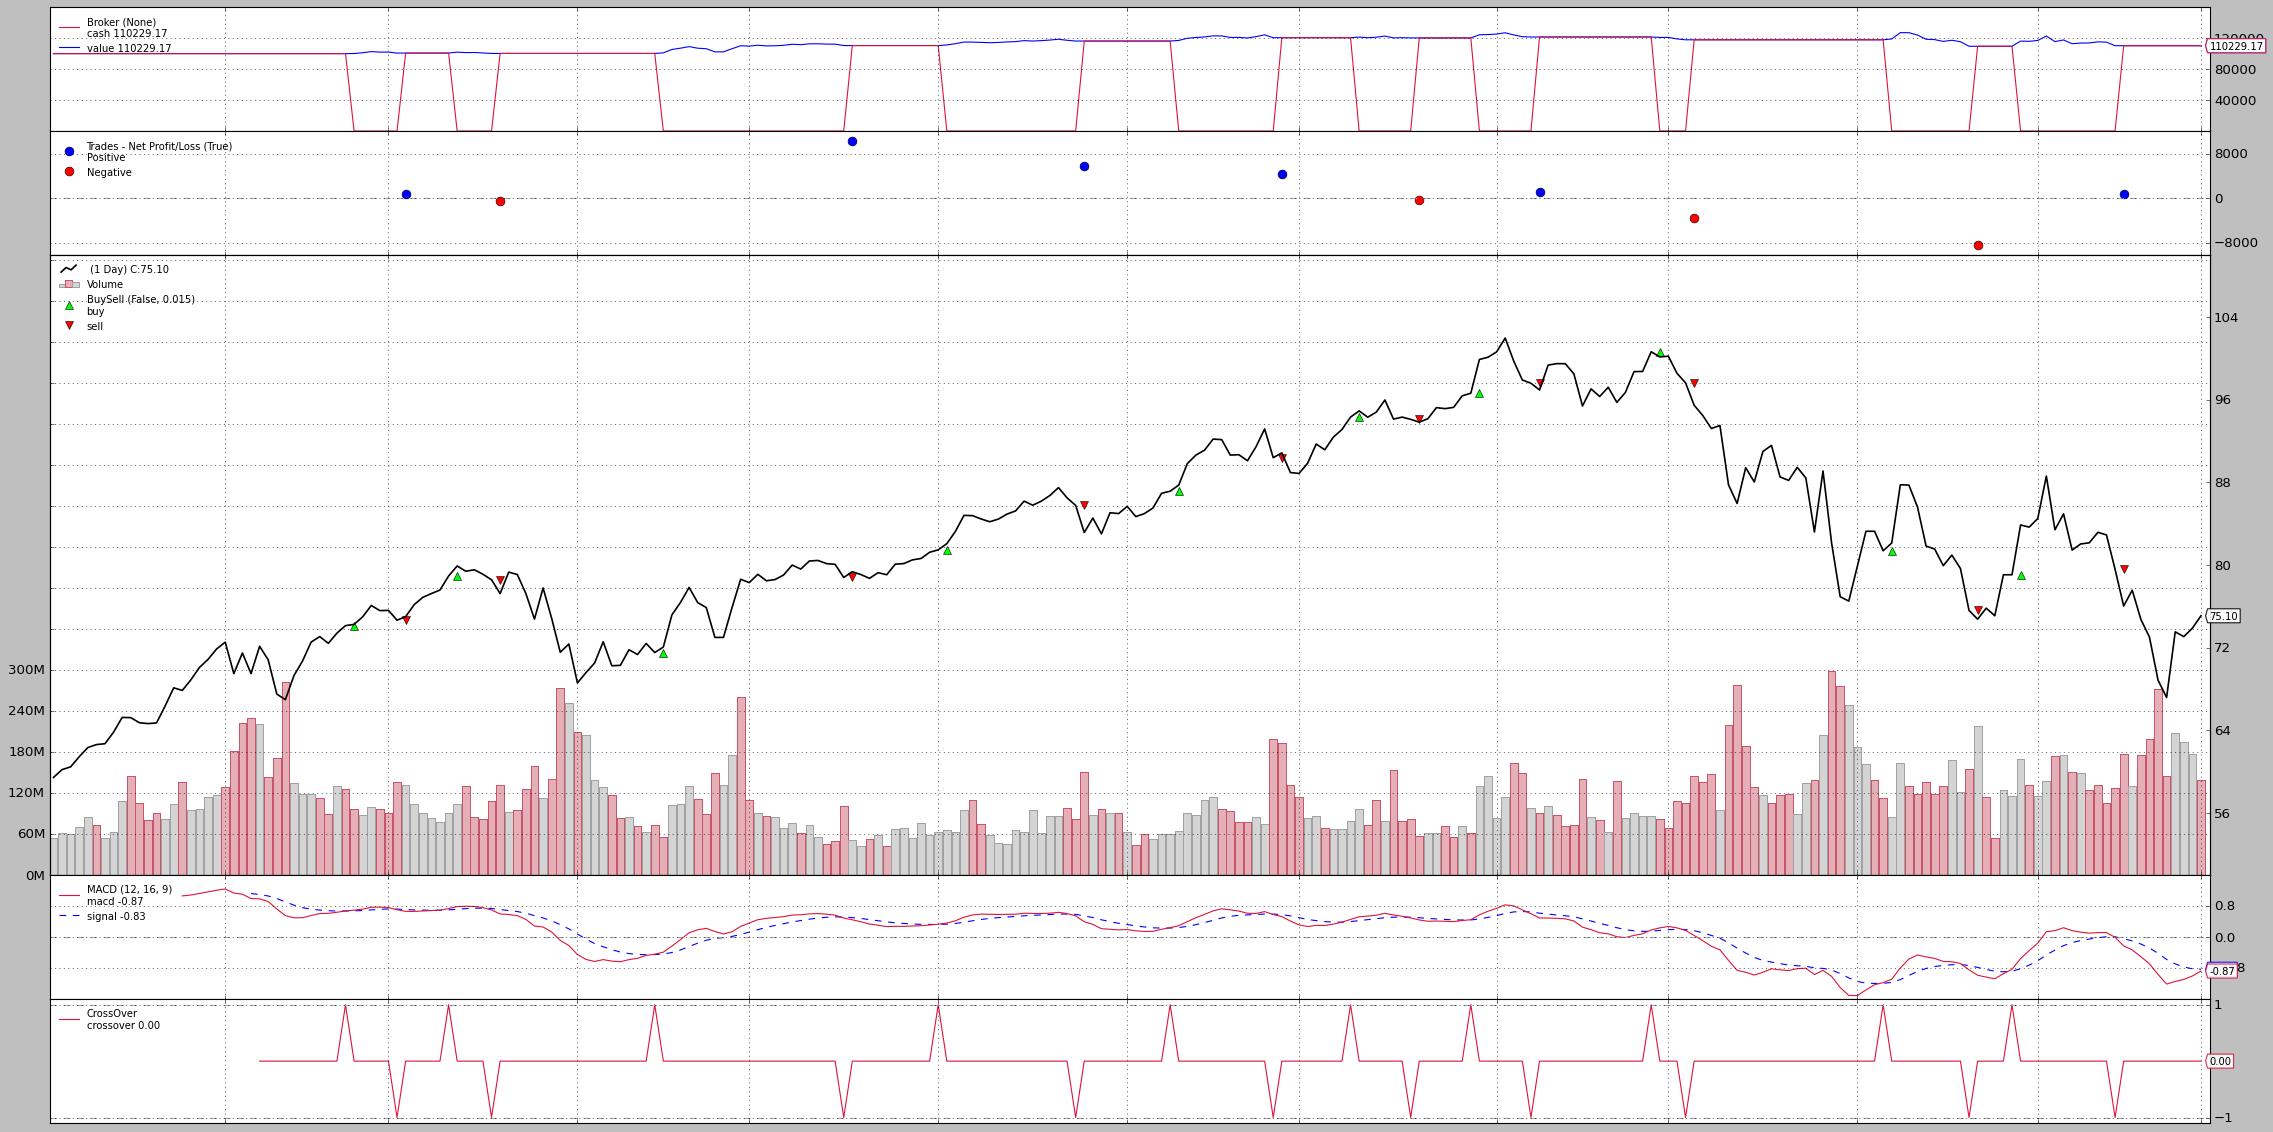

In [21]:
result, history = backtest(MAMAStrategy,df, verbose=True, return_history=True)

In [20]:
history['orders']

,strat_id,strat_name,dt,type,price,size,order_value,portfolio_value,commission,pnl
0,0,,2018-02-22,buy,74.146004,1347,99874.667015,100162.979683,0.0,0.000000
1,0,,2018-03-02,sell,74.672501,-1347,99874.667015,100709.191307,0.0,709.191307
2,0,,2018-03-12,buy,78.944504,1274,100575.297821,101951.339363,0.0,0.000000
3,0,,2018-03-19,sell,78.584000,-1274,100575.297821,100249.909019,0.0,-459.282288
4,0,,2018-04-16,buy,71.539497,1399,100083.756828,100999.072922,0.0,0.000000
5,0,,2018-05-16,sell,78.806000,-1399,100083.756828,110415.745850,0.0,10165.836830
6,0,,2018-06-01,buy,81.481003,1353,110243.796799,111222.134758,0.0,0.000000
7,0,,2018-06-25,sell,85.783501,-1353,110243.796799,116237.025459,0.0,5821.279610
8,0,,2018-07-11,buy,87.153503,1332,116088.466553,117031.558907,0.0,0.000000
9,0,,2018-07-27,sell,90.400002,-1332,116088.466553,120561.360939,0.0,4324.335480


##Improvements

Improvements: I would add a functionality for live backtesting to allow users to backtest their strategy in real-time. But this would involve the library needing to integrate with a third-party service that provides live stock data. However, it would be useful to take advantage of this library's features such as the optimal portfolio weighting, but having the weights update in real-time. Specifically for the news sentiment strategy, one way to improve it would be to scrape off of another news website or allow the user to select which news website they wanted to scrape data off of such as WSJ, Bloomberg, etc. Currently, the user is restricted to news articles that are written by Business Times which might not cover all articles. Another useful function would be if you could choose a specific strategy but then pass in a list of stock tickers to analyze which stock works the best for the strategy. Currently, we can run the single strategy backtest over all of the available stock and determine which stock works best for that strategy, but if there was a way to automate this similar to how the grid search is internally optimized, this would improve the backtesting suite.